In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **Data overview**

In [35]:
df = pd.read_csv('50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [37]:
df.shape

(50, 5)

In [38]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


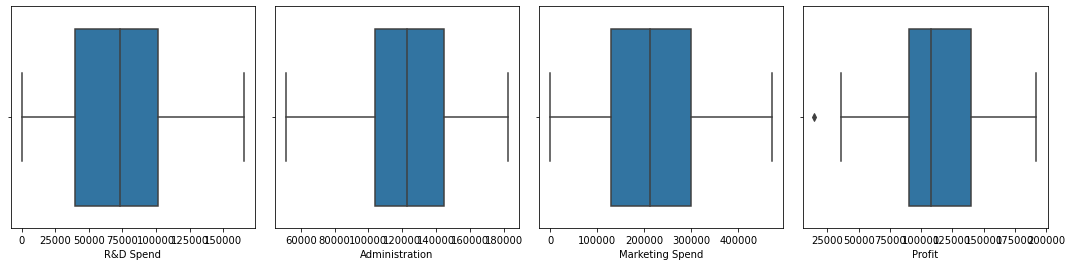

In [39]:
col_dict = {'R&D Spend':1,'Administration':2,'Marketing Spend':3,'Profit':4}

plt.figure(figsize=(15,18))

for x,i in col_dict.items():
    plt.subplot(5,4,i)
    sns.boxplot(x=df[x])
    
plt.tight_layout()
plt.show()

## **Correlation**

In [40]:
df.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


<AxesSubplot:>

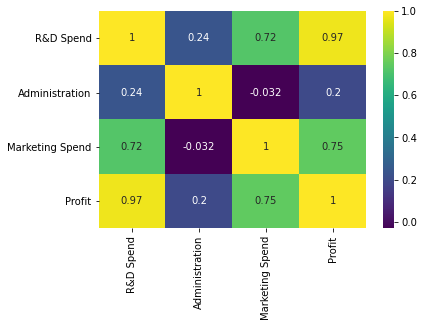

In [41]:
sns.heatmap(df.corr(),annot=True,cmap='viridis')

<AxesSubplot:xlabel='R&D Spend', ylabel='Profit'>

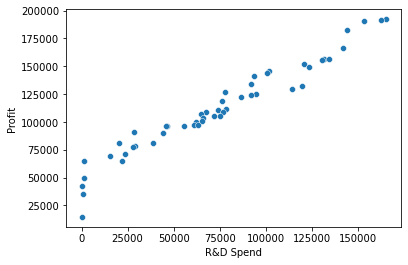

In [42]:
sns.scatterplot(x='R&D Spend',y='Profit',data=df)

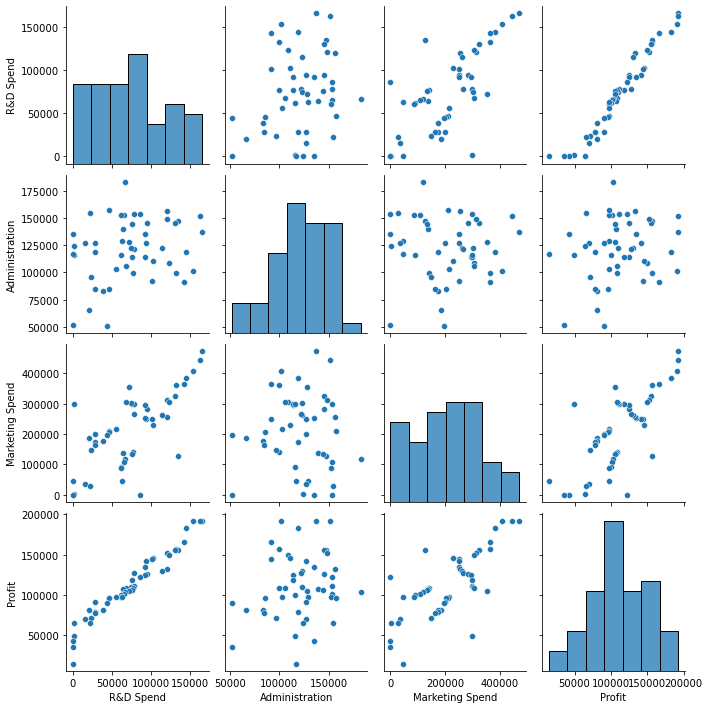

In [43]:
sns.pairplot(df,kind='scatter')

array([[<AxesSubplot:title={'center':'R&D Spend'}>,
        <AxesSubplot:title={'center':'Administration'}>],
       [<AxesSubplot:title={'center':'Marketing Spend'}>,
        <AxesSubplot:title={'center':'Profit'}>]], dtype=object)

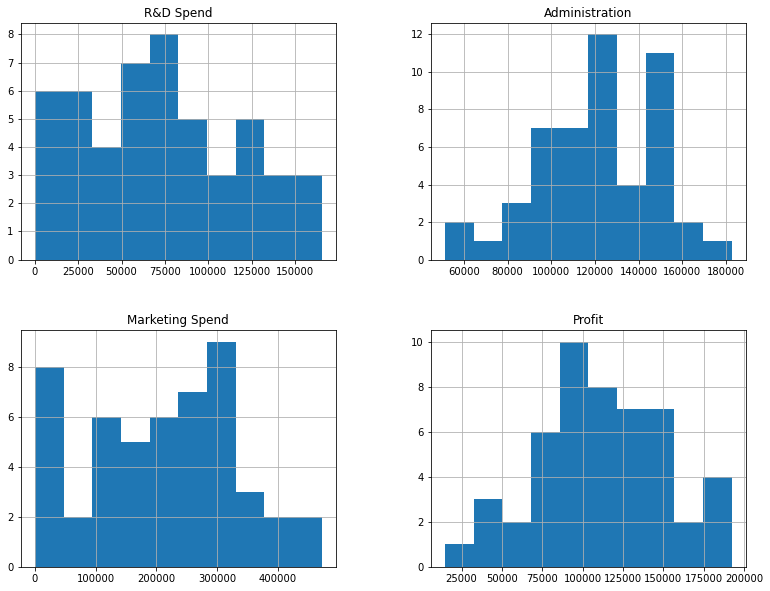

In [44]:
df.hist(figsize=(13,10))

In [45]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


Let's convert State column to a set of binary variables.

In [46]:
df['State'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [47]:
df['State'] = pd.Categorical(df['State']) 
dfDummies = pd.get_dummies(df['State'],prefix = 'State') 
dfDummies

,State_California,State_Florida,State_New York
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,0,1,0
5,0,0,1
6,1,0,0
7,0,1,0
8,0,0,1
9,1,0,0


You can see that we have 3 columns corresponding to 3 unique values in State column with the values are 0 or 1. But in the regression setting, we just need to represent this by a matrix with only 2 columns because a regression model typically includes an intercept term.

In [48]:
df = pd.concat([df, dfDummies], axis=1)
df = df.drop(["State_California"], axis = 1)
df = df.drop(["State"], axis = 1)
df.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0


## **Linear Regression**

In [49]:
X = df.drop('Profit',axis=1)
y = df['Profit']

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=20,random_state=138)

In [52]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [53]:
model = reg.fit(X_train, y_train)

In [54]:
y_pred = model.predict(X_test)
y_pred

array([128852.00747815, 116371.21241494, 112866.6848118 ,  99863.05869475,
        72362.01239899,  84290.57717233, 152031.77985692, 147599.1601519 ,
       134898.58091426, 118286.57794023,  45595.07660755, 119929.44026495,
        87120.76986765, 163009.43777733,  50379.55110715, 106738.73094735,
        98578.86040581,  64237.59673925,  94826.81752999, 161731.98769383])

In [55]:
df = pd.DataFrame({"Main values" : y_test, "Predict values" : y_pred, "Differences":abs(y_pred-y_test)})
df

,Main values,Predict values,Differences
12,141585.52,128852.007478,12733.512522
16,126992.93,116371.212415,10621.717585
24,108552.04,112866.684812,4314.644812
31,97483.56,99863.058695,2379.498695
36,90708.19,72362.012399,18346.177601
37,89949.14,84290.577172,5658.562828
14,132602.65,152031.779857,19429.129857
15,129917.04,147599.160152,17682.120152
10,146121.95,134898.580914,11223.369086
21,111313.02,118286.577940,6973.557940


In [56]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [57]:
print(f'MAE: {mean_absolute_error([y_test], [y_pred])}')
print(f'MSE: {mean_squared_error([y_test], [y_pred])}')
print(f'RMSE: {np.sqrt(mean_absolute_error([y_test], [y_pred]))}')
print(f'R-squared: {model.score(X_train, y_train)}')

MAE: 8032.823425390513
MSE: 100990682.2910825
RMSE: 89.62601980111866
R-squared: 0.9631819964858507
